<a href="https://colab.research.google.com/github/Ashwincore/Loan_Prediction/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_learning/Dataset.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dropping the missing values
loan_dataset['Gender'].fillna(loan_dataset['Gender'].value_counts().idxmax(), inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].value_counts().idxmax(), inplace=True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].value_counts().idxmax(), inplace=True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].value_counts().idxmax(), inplace=True)
loan_dataset["LoanAmount"].fillna(loan_dataset["LoanAmount"].mean(skipna=True), inplace=True)
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].value_counts().idxmax(), inplace=True)

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
y_n_stat = {'N' : 0,'Y' : 1}
loan_dataset['Gender'] = loan_dataset['Gender'].replace(gender_stat)
loan_dataset['Married'] = loan_dataset['Married'].replace(yes_no_stat)
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(dependents_stat)
loan_dataset['Education'] = loan_dataset['Education'].replace(education_stat)
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].replace(yes_no_stat)
loan_dataset['Property_Area'] = loan_dataset['Property_Area'].replace(property_stat)
loan_dataset['Loan_Status'] = loan_dataset['Loan_Status'].replace(y_n_stat)

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


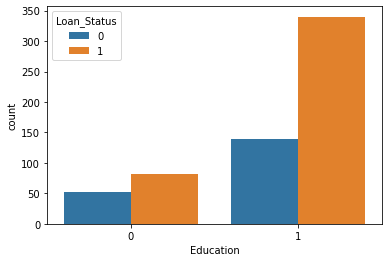

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

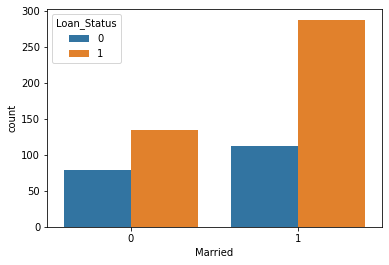

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [ ]:
X = loan_dataset.drop(columns=["Loan_Status","Loan_ID"], axis=1)
y = loan_dataset["Loan_Status"]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model without L2 Regularization

In [ ]:
import tensorflow
from keras.layers import Dropout
model = Sequential()

# Add the first hidden layer with 'relu' activation
model.add(Dense(32, activation='relu',input_shape=(X_train.shape[1],)))
# Add the second hidden layer
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
# Add the output layer with 'sigmoid' activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32,validation_data=(X_test,y_test))


Epoch 1/200
16/16 [==============================] - 2s 18ms/step - loss: 1.0648 - accuracy: 0.5377 - val_loss: 1.0019 - val_accuracy: 0.7236
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 1.0094 - accuracy: 0.6232 - val_loss: 0.9513 - val_accuracy: 0.7480
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.9491 - accuracy: 0.7067 - val_loss: 0.9124 - val_accuracy: 0.7480
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.9191 - accuracy: 0.7291 - val_loss: 0.8806 - val_accuracy: 0.7642
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8811 - accuracy: 0.7434 - val_loss: 0.8543 - val_accuracy: 0.7805
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8527 - accuracy: 0.7556 - val_loss: 0.8306 - val_accuracy: 0.7886
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8239 - accuracy: 0.7760 - val_loss: 0.8073 - val_accuracy: 0.7967
Epoch 8/200


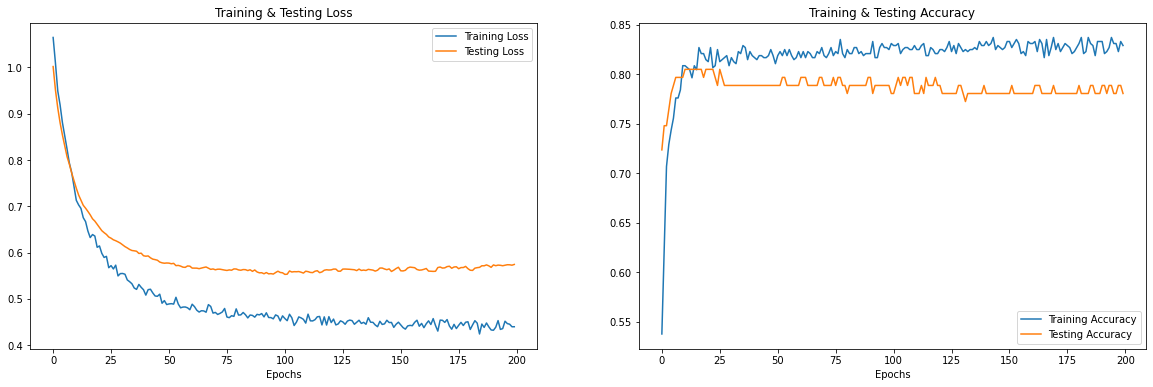

In [ ]:
epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = model.history.history['accuracy']
train_loss = model.history.history['loss']
test_acc = model.history.history['val_accuracy']
test_loss = model.history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
predicted = model.predict(X_test)
predicted=predicted.round()  

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print ('accuracy =',metrics.accuracy_score(y_test, predicted))

accuracy = 0.7479674796747967


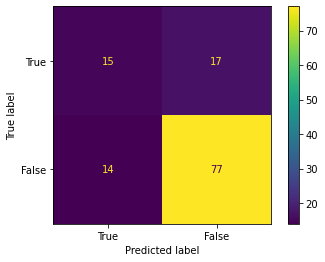

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49        32
           1       0.82      0.85      0.83        91

    accuracy                           0.75       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.74      0.75      0.74       123



# Loan Amount Prediction using Regression

In [ ]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [ ]:
X = loan_dataset.drop(columns=['Loan_ID','LoanAmount','Loan_Status'],axis=1).values
Y = loan_dataset['LoanAmount'].values

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
model=MLPRegressor(hidden_layer_sizes=(200,200),activation='relu',solver='adam', alpha=0.001,max_iter=300, shuffle=True)

In [ ]:
model.fit(X_train,Y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(200, 200), max_iter=300)

In [ ]:
X_test_prediction = model.predict(X_test)

In [ ]:
X_test_prediction

array([198.80959877, 130.50445303, 151.17811694, 109.64691093,
       106.63494918, 114.75843303, 122.139696  , 111.40405869,
       124.35179984, 112.8619524 , 140.48615429, 138.47369332,
       120.46872977, 144.88536356, 161.65352943, 144.29076577,
       102.84529311, 200.93643275, 136.91833003, 100.46038845,
       112.90185462, 196.90639474, 159.60476578, 167.30185353,
       248.08876552, 253.39745544, 120.9623736 , 117.51077232,
        89.09240015,  93.91443575, 116.82155275, 184.22533734,
       129.76114659, 156.95943951, 216.74422346, 156.23630702,
       154.67280726, 150.83662641, 123.60135646, 102.30098495,
       144.9071142 , 126.82925666, 212.32574064, 131.57177846,
       119.24086726, 125.02772135, 183.18496006, 137.81719531,
       153.02509422, 140.07375952, 126.80392909, 211.53952227,
       134.43496716, 117.37166169, 160.96484516,  99.66351122,
       183.71414657, 180.52984671, 128.40014761, 162.59811792,
       413.9041657 , 165.98754197, 164.15842241, 171.21

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = X_test_prediction.flatten()
df['Actual Labels'] = Y_test.flatten()

In [ ]:
df.head(10)

,Predicted Labels,Actual Labels
0,198.809599,228.0
1,130.504453,130.0
2,151.178117,158.0
3,109.646911,71.0
4,106.634949,70.0
5,114.758433,107.0
6,122.139696,120.0
7,111.404059,66.0
8,124.351800,173.0
9,112.861952,110.0


# Model with L2 Regularization

In [ ]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,2,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,2,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [ ]:
X = loan_dataset.drop(columns=["Loan_Status","Loan_ID"], axis=1)
y = loan_dataset["Loan_Status"]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from keras.engine.base_layer import regularizers
import tensorflow
from keras.layers import Dropout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = Sequential()

# Add the first hidden layer with 'relu' activation
model.add(Dense(32, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01), input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
# Add the second hidden layer
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.01)))
model.add(Dropout(0.2))
# Add the output layer with 'sigmoid' activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/200
16/16 [==============================] - 1s 14ms/step - loss: 1.1717 - accuracy: 0.3829 - val_loss: 1.0729 - val_accuracy: 0.4634
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 1.0514 - accuracy: 0.5499 - val_loss: 1.0032 - val_accuracy: 0.6016
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0066 - accuracy: 0.6232 - val_loss: 0.9522 - val_accuracy: 0.7073
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.9441 - accuracy: 0.7026 - val_loss: 0.9133 - val_accuracy: 0.7805
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8944 - accuracy: 0.7393 - val_loss: 0.8810 - val_accuracy: 0.7967
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8729 - accuracy: 0.7373 - val_loss: 0.8519 - val_accuracy: 0.7967
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8372 - accuracy: 0.7556 - val_loss: 0.8235 - val_accuracy: 0.8049
Epoch 8/200


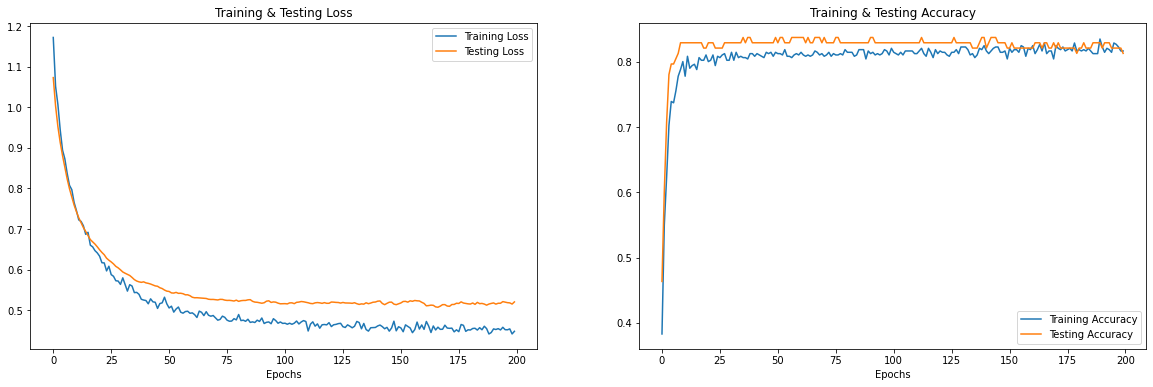

In [ ]:
epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = model.history.history['accuracy']
train_loss = model.history.history['loss']
test_acc = model.history.history['val_accuracy']
test_loss = model.history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
predicted = model.predict(X_test)
predicted=predicted.round()  

4/4 [==============================] - 0s 3ms/step


In [ ]:
print ('accuracy =',metrics.accuracy_score(y_test, predicted))

accuracy = 0.8130081300813008


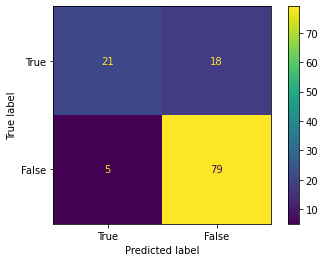

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65        39
           1       0.81      0.94      0.87        84

    accuracy                           0.81       123
   macro avg       0.81      0.74      0.76       123
weighted avg       0.81      0.81      0.80       123

